# Demographical Analysis of crime in New York city

# 1. Motivation

## NYPD Arrests Data (Historic)

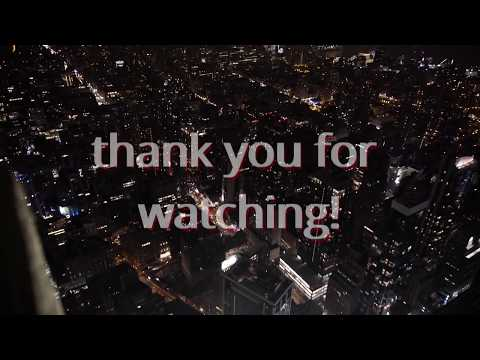

In [210]:
from IPython.display import Audio,Image, YouTubeVideo
YouTubeVideo(id='zlyklp19spU',width=600,height=300)

The dataset for this analysis is the [_*NYPD Arrests Data*_](https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u), which consists of _4.551.566_ rows and _18_ columns. Each row represents a crime incident, which has 18 different attributes.

New York is a global metropolis with total population of almost 9 million people. Naturally there are many approaches on analysing demographics and getting insights not only for the whole city, but also for each one of its five boroughs _(Bronx, Staten Island, Brooklyn, Manhattan and Queens)_. We have chosen to analyze the demographics of crime evolution in the city and in [NYC Open Data](https://opendata.cityofnewyork.us/) we found just the dataset we needed. That is because it is a massive historical dataset of crime incidents with data of more than ten years (2006 - 2017). Apart from the time, place and kind of crime that was commited, it also includes perpetrator demographics. Many of the dataset's attributes are id's or classification codes for organization purposes. The ones that really mattter for our analysis and thus we kept are the following (names are changed on purporse so they are intuitively understood by the reader):

* **Arrest Date**
* **Crime Description** (Classification of crime)
* **Borough**
* **Age Group**
* **Gender**
* **Race**

The goal of this project is to produce a quiality reader-driven poster. This means that the reader/user of our observable will be able to get involved, explore and get insights about the evolution of crime demographics in New York, very intuitively by the use of available interactions, with very little guidance or text.

# 2. Basic Stats

## 2.1 Data Cleaning and Pre-processing

>Importing relevant python packages.

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

### 2.1.1 First look
>Let's start by the size of our dataset. It is quite a big one as it has 4.551.566 ros and 18 columns. That is 81.928.188 elements in total!!

In [217]:
raw_data = pd.read_csv("nyc.csv")
raw_data.shape

(4551566, 18)

>Now let's take a look at how it actually looks like.

In [218]:
raw_data.head(2)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241


### 2.1.2 Get rid of the irrelevant columns. Replace column names with more intuitive ones
>You can see that very few of the column names actually make sense. With a little help from the [_*NYPD Arrests Data*_](https://data.cityofnewyork.us/Public-Safety/NYPD-Arrests-Data-Historic-/8h9b-rp9u) documentation we understood that many of these attributes are id's or classification codes for organization purposes. 
As mentioned before this analysis is supposed to have a demographical flavor, so most of these columns are redundant and that is why the first preprocessing task is to get rid of them and keep only the relevant ones (see below).

In [219]:
new_columns = ['ARREST_DATE', 'OFNS_DESC', 'ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']
raw_data = raw_data[new_columns]
# give to our columns more intuitive names
raw_data.columns = ['ARREST_DATE', 'CRIME_TYPE', 'BOROUGH', 'AGE_GROUP', 'GENDER', 'RACE']
print (list(raw_data.columns))

['ARREST_DATE', 'CRIME_TYPE', 'BOROUGH', 'AGE_GROUP', 'GENDER', 'RACE']


### 2.1.3 Selecting the focuscrimes
>As you can see below, there are as many as 72 different crime types. By further analysis we see that the first 20 out of 72 crime types correspond to more than 90% of all the crimes in the dataset. Since this is a huge one, we can live with this tradeoff, so we only keep the first 20 as our focuscrimes.

>New dataset size: 4.138.649 rows and 8 columns.

In [220]:
crimes = raw_data.CRIME_TYPE.value_counts() # create a pandas series to get all the crime types in a descending order,
                                           # based on their occurences.

print (f"There are {len(crimes)} crime types in total in the dataset.")

#number of crime types to be kept
num = 20 
#sum of all crime types in the dataset
total_sum = sum(crimes.values)
# sum of selected crime types in the dataset
focuscrimes_sum = sum(crimes.values[0:num])
# how much the selected crime types contribute to the sum of all crime types
focuscrimes_percent = round((focuscrimes_sum/total_sum)*100)

# print the selected crime types contribution
print (f"\n{num} focuscrimes make for {focuscrimes_percent}% of all crimes in the dataset.")

# create the focuscrimes list, which contains only the selected crime types
focuscrimes = list(crimes.index[0:num])
# 
new_data = raw_data[raw_data.CRIME_TYPE.isin(focuscrimes)]

print (f"\nAfter keeping the selected crime types, the dataset consists of {new_data.shape[0]} rows and {new_data.shape[1]} columns.")

There are 72 crime types in total in the dataset.

20 focuscrimes make for 91.0% of all crimes in the dataset.

After keeping the selected crime types, the dataset consists of 4138649 rows and 6 columns.


### 2.1.4 Removing weird values from the AGE_GROUP column

> While working with the visualizations we bumped into some weird values on the AGE_GROUP column. Being very few comparing to the dataset size, we removed the corresponding incidents from the dataset. Below you can take a look at what these weird values look like and after that you can see what values the final AGE_GROUPS column consists of.

In [221]:
# as you can see below the 'AGE_GROUP' column contains several values, which do not make sense.
print (set(new_data.AGE_GROUP))

{'929', nan, '955', '936', '314', '940', '931', '954', '895', '965', '946', '956', '812', '1953', '1024', '927', '1918', '640', '352', '723', '896', '948', '923', '808', '194', '922', '339', '212', '941', '1937', '947', '1916', 'UNKNOWN', '945', '935', '317', '309', '338', '446', '933', '938', '323', '1947', '816', '925', '944', '65+', '949', '943', '926', '708', '330', '912', '894', '25-44', '930', '1928', '316', '740', '939', '1018', '951', '909', '2007', '921', '952', '924', '932', '2000', '1922', '1042', '231', '928', '<18', '920', '942', '934', '959', '237', '910', '937', '1048', '18-24', '709', '45-64', '320', '1942'}


In [222]:
# we get rid of those
valid_ages = set(['<18', '18-24', '25-44', '45-64', '65+'])
new_data2 = new_data[(new_data.AGE_GROUP.isin(valid_ages))]
print (set(new_data2.AGE_GROUP))

{'25-44', '<18', '18-24', '65+', '45-64'}


### 2.1.5 But are there any Nan values?

>Next we want to check how many NaN values there are and maybe delete those too. We check this for every distinct column

In [223]:
# time to check how many nan values there are per column and get rid of them.
for column in new_data2.columns:
    test_data = new_data2.dropna(subset=[column])
    nan_count = len(new_data2) - len(test_data)
    print (f"Column {column} has {nan_count} Nan values.")

Column ARREST_DATE has 0 Nan values.
Column CRIME_TYPE has 0 Nan values.
Column BOROUGH has 7 Nan values.
Column AGE_GROUP has 0 Nan values.
Column GENDER has 0 Nan values.
Column RACE has 0 Nan values.


>7 Nan values in total are not much at all and it's time we let them go.

In [224]:
# get rid of all nan values
data_final = new_data2.dropna() # letting go all the rows with at least one NaN value in our dataset.
for column in data_final.columns:
    test_data = data_final.dropna(subset=[column])
    nan_count = len(test_data) - len(data_final)
    print (f"Column {column} has {nan_count} Nan values.")

Column ARREST_DATE has 0 Nan values.
Column CRIME_TYPE has 0 Nan values.
Column BOROUGH has 0 Nan values.
Column AGE_GROUP has 0 Nan values.
Column GENDER has 0 Nan values.
Column RACE has 0 Nan values.


### 2.1.6 Convert string-type dates to datetime objects
> In general dealing with dates can be tricky, but converting them to datetime objects makes our life much easier. Since this conversion demands traversing all the dataset's rows, we kept it as the last task, so the dataset is already reduced in size from the previous steps. 

In [225]:
# lastly we convert the dates from strings to datetime objects 
data_final['ARREST_DATE'] = pd.to_datetime(data_final['ARREST_DATE'])

In [226]:
# check what years are included in our dataset
years = set()
for date in set(data_final['ARREST_DATE']):
    years.add(date.year)
years = list(map(str, sorted(list(years))))
print (years)

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [227]:
data_final.head(3)

,ARREST_DATE,CRIME_TYPE,BOROUGH,AGE_GROUP,GENDER,RACE
0,2017-12-31,MISCELLANEOUS PENAL LAW,Q,25-44,M,BLACK
1,2017-12-31,OTHER OFFENSES RELATED TO THEFT,Q,25-44,M,ASIAN / PACIFIC ISLANDER
2,2017-12-31,OTHER STATE LAWS,K,18-24,M,BLACK


# 3. Data Analysis

>Before diving into the d3.js visualizations we did some data analysis and vizualizations with python, to get some insight about the data and also take ideas about the interactive visualizations we can do with Javascript.<br/><br/>
Firstly, we create the plot_bar function such that we easily produce some of the following visualizations.

In [228]:
def plot_bar(one_dict, one_list, rows, cols):
    #create the subplot
    fig, axes = plt.subplots(rows, cols, sharex=True, figsize=(15,10))

    # Here we set the maximum number of labels we want in the x and y axis respectively.
#     for axi in axes.flat:
#         axi.xaxis.set_major_locator(plt.MaxNLocator(8))
#         axi.yaxis.set_major_locator(plt.MaxNLocator(4))

    #Populate each subplot with a barchart of certain properties  
    i = 0
    for row in range(0,rows):
        for col in range(0,cols):
            #create barchart
            bar = axes[row,col].bar(one_list, one_dict[list(one_dict.keys())[i]])
            #Put incident title as text inside each frame.
            axes[row,col].text(0.05, 0.9, list(one_dict.keys())[i], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[row,col].transAxes)
            #Set margin
            axes[row,col].margins(x=0.04, y=0.2)
            i+=1 #Iterate through the dictionary values, which are lists containing the number of incidents per year.

    plt.show()

### 3.1 Evolution of crime incidents for different races (plot below)

>Through the following plot we can see that races like _Black_ and _White Hispanic_ have a decreasing trend in terms of the amount of incidents through the years. _Pacific islanders_ on the other hand seem to have a small increase. Notice that every subplot has a different scale in the y-axis, which shows that different races have higher, or lower amount of incidents in general.

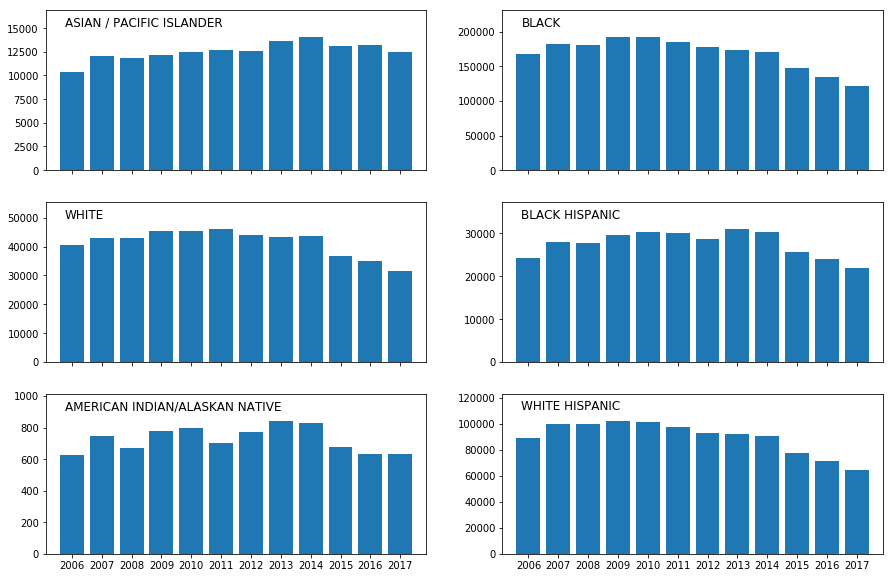

In [229]:
data = data_final.set_index('ARREST_DATE')

races = set(data.RACE)
races.remove('OTHER')
races.remove('UNKNOWN')

race_dict = {}
for race in races:
    df = data[(data.RACE==race)]
    df = df.groupby(df.index.year).size()
    race_dict[race] = list(df)

plot_bar(race_dict, years, 3, 2)

### 3.2 Evolution of crime incidents for different age groups (plot below)

>Through this plot we can see a really interesting decrease through the years, in the number of incidents regarding underaged perpetrators. 25-44, which is the most highly crime-related agegroup, also has a decreasing trend, while 65+ people seem to get more involved in criminal activities as years go passing by.

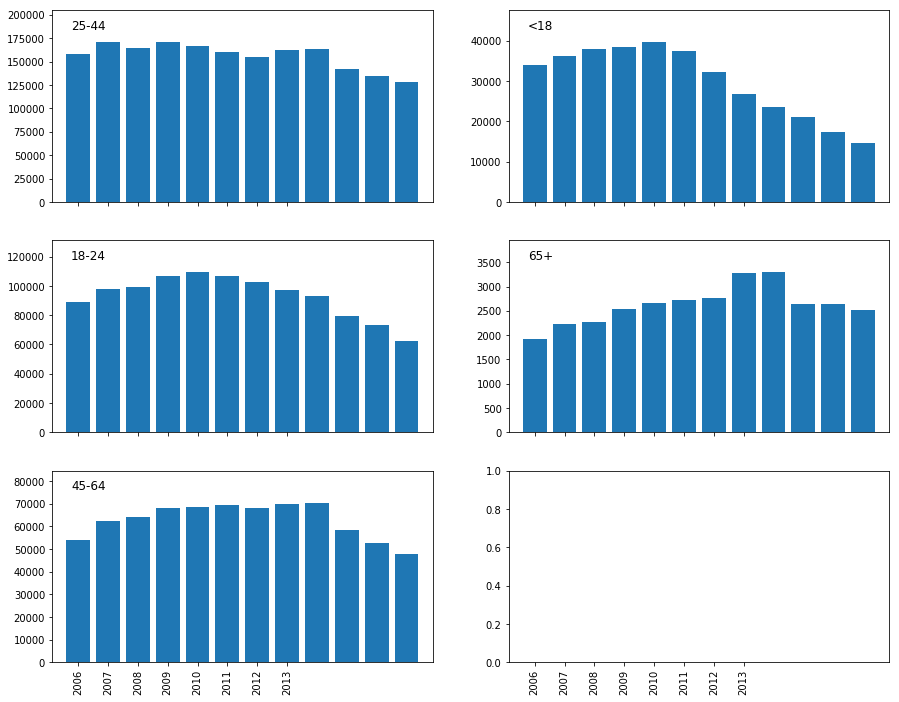

In [276]:
age_groups = set(data.AGE_GROUP)

age_dict = {}
for age in age_groups:
    df = data[(data.AGE_GROUP==age)]
    df = df.groupby(df.index.year).size()
    age_dict[age] = list(df)

    
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15,12))
axes[0, 0].bar(years, age_dict[list(age_dict.keys())[0]])
axes[0, 0].text(0.05, 0.9, list(age_dict.keys())[0], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[0, 0].transAxes)
axes[0, 0].margins(x=0.04, y=0.2)


axes[0, 1].bar(years, age_dict[list(age_dict.keys())[1]])
axes[0, 1].text(0.05, 0.9, list(age_dict.keys())[1], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[0, 1].transAxes)
axes[0, 1].margins(x=0.04, y=0.2)


axes[1, 0].bar(years, age_dict[list(age_dict.keys())[2]])
axes[1, 0].text(0.05, 0.9, list(age_dict.keys())[2], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[1, 0].transAxes)
axes[1, 0].margins(x=0.04, y=0.2)


axes[1, 1].bar(years, age_dict[list(age_dict.keys())[3]])
axes[1, 1].text(0.05, 0.9, list(age_dict.keys())[3], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[1, 1].transAxes)
axes[1, 1].margins(x=0.04, y=0.2)


axes[2, 0].bar(years, age_dict[list(age_dict.keys())[4]])
axes[2, 0].text(0.05, 0.9, list(age_dict.keys())[4], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[2, 0].transAxes)
axes[2, 0].margins(x=0.04, y=0.2)

for tick in axes[2,0].get_xticklabels():
    tick.set_rotation(90)
for tick in axes[2,1].get_xticklabels():
    tick.set_rotation(90)
    
plt.xticks(range(8), years)
# plt.yticks(range(5))

plt.show()

### 3.3 Grouped Barcharts

>Grouped or stacked barcharts, visually give very interesting information in terms of the distribution of genders, races etc, for each of the different boroughs or the different focuscrimes. Below we have created four such plots that as you will see, focus on the race and gender of the perpetrators.

In [231]:
def plot_chart(one_dict, color_dict, one_list):
    N = len(one_list)
    ind = np.arange(N)
    width = 0.6
    plot_race_data = list(data_dict.values())

    bottom = np.zeros(N)

    plt.figure(figsize=(10,10))
    for elem, color in zip(plot_race_data,list(color_dict.keys())):
        plt.bar(ind, elem, width, bottom=bottom, color=color, label=color_dict[color])
        plt.legend(prop={'size': 12})
        bottom+=elem
    x = plt.xticks(np.arange(20,step=1),one_list, rotation='vertical',fontsize=11)
    plt.savefig('chart.png')

> __3.3.1__ ___Races distribution per crime type___<br/>
By looking at this graph, we can see not only the distribution of races per focuscrime, but also the incidents per focuscrime themeselves in a descending order. Same case with the following graph.

In [232]:
#create grouped barchart with different race for each crime
data_dict = {'WHITE':[], 'WHITE HISPANIC':[], 'BLACK':[], 'BLACK HISPANIC':[], 'ASIAN / PACIFIC ISLANDER':[],
             'AMERICAN INDIAN/ALASKAN NATIVE':[], 'UNKNOWN':[], 'OTHER':[]}

color_dict = {}
colors = ['wheat', 'darkorange', 'k', 'brown', 'yellow', 'red', 'grey', 'lightgrey']
for race,color in zip(data_dict.keys(),colors):
    color_dict[color] = race

for crime in focuscrimes:
    new_data = data_final[(data_final.CRIME_TYPE==crime)]
    grouped = dict(new_data.groupby('RACE').RACE.count())
    for key in grouped.keys():
        data_dict[key].append(grouped[key])

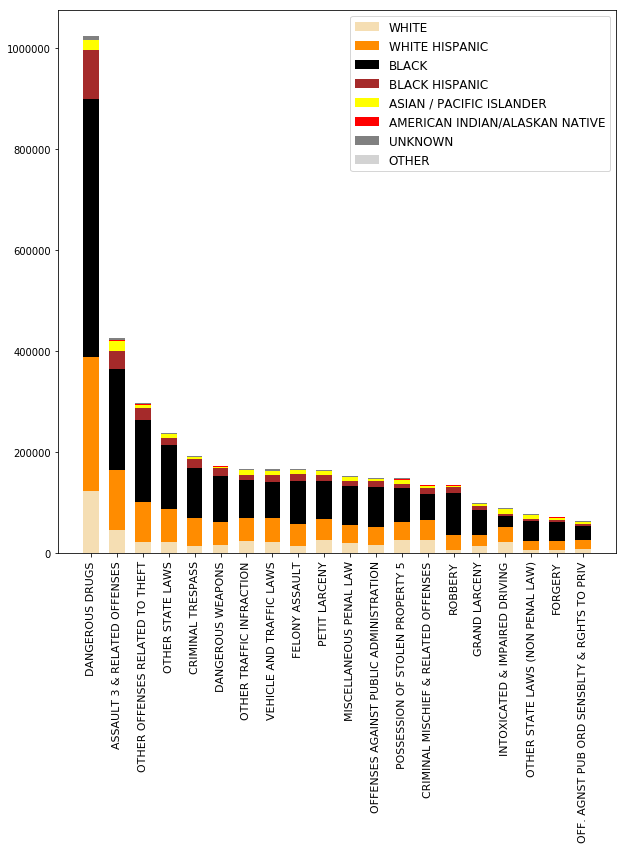

In [233]:
plot_chart(data_dict, color_dict, focuscrimes)

>__3.3.2__ ___Gender distribution per crime type___

In [234]:
# create grouped barchart with different gender for each crime
data_dict = {'M':[], 'F':[]}

color_dict = {'b':'Male', 'pink':'Female'}

for crime in focuscrimes:
    new_data = data_final[(data_final.CRIME_TYPE==crime)]
    grouped = dict(new_data.groupby('GENDER').GENDER.count())
    for key in grouped.keys():
        data_dict[key].append(grouped[key])

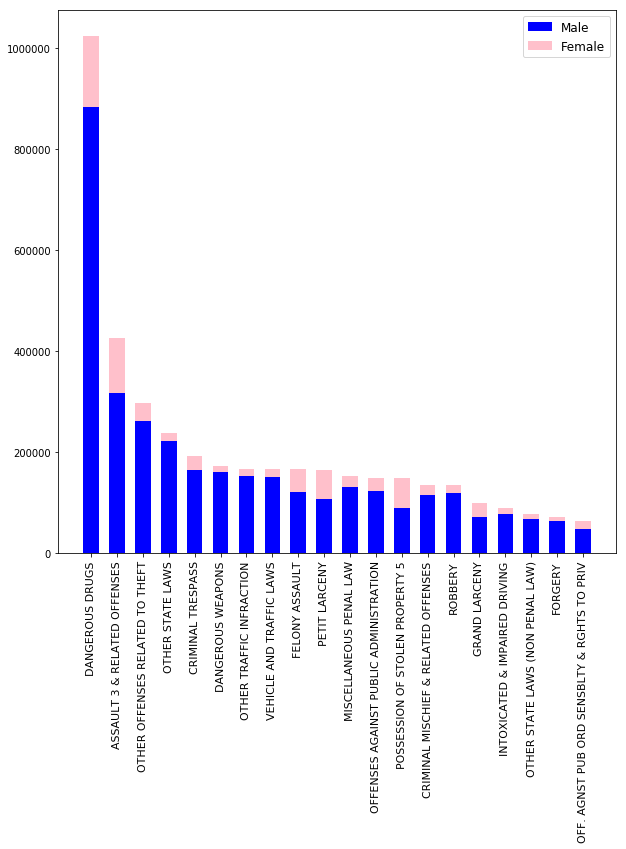

In [235]:
plot_chart(data_dict, color_dict, focuscrimes)

>__3.3.3__ ___Races distribution per borough___<br/>
By looking at this graph, we can see not only the distribution of genders per borough, but also the incidents per borough themeselves in a descending order. Same case with the following graph.

In [236]:
# create grouped barchart with different race for each boro
boroughs_dict = {'K':'Brooklyn', 'M':'Manhattan', 'B':'Bronx', 'Q':'Queens', 'S':'Staten Island'}
boroughs = list(data_final.groupby('BOROUGH').BOROUGH.count().sort_values(ascending=False).index)
boroughs_names = [boroughs_dict[boro] for boro in boroughs]

data_dict = {'WHITE':[], 'WHITE HISPANIC':[], 'BLACK':[], 'BLACK HISPANIC':[], 'ASIAN / PACIFIC ISLANDER':[],
             'AMERICAN INDIAN/ALASKAN NATIVE':[], 'UNKNOWN':[], 'OTHER':[]}

color_dict = {}
colors = ['wheat', 'darkorange', 'k', 'brown', 'yellow', 
          'red', 'grey', 'lightgrey']
for race,color in zip(data_dict.keys(),colors):
    color_dict[color] = race

for boro in boroughs:
    new_data = data_final[(data_final.BOROUGH==boro)]
    grouped = dict(new_data.groupby('RACE').RACE.count())
    for key in data_dict.keys():
        data_dict[key].append(grouped[key])

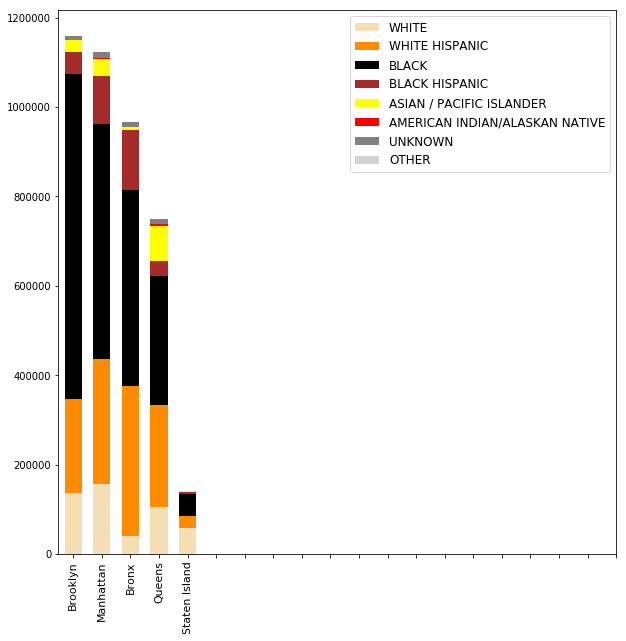

In [237]:
plot_chart(data_dict, color_dict, boroughs_names)

>__3.3.4__ ___Genders distribution per borough___

In [238]:
# create grouped barchart with different sex for each boro
boroughs_dict = {'K':'Brooklyn', 'M':'Manhattan', 'B':'Bronx', 'Q':'Queens', 'S':'Staten Island'}
boroughs = list(data_final.groupby('BOROUGH').BOROUGH.count().sort_values(ascending=False).index)
boroughs_names = [boroughs_dict[boro] for boro in boroughs]

data_dict = {'M':[], 'F':[]}

color_dict = {'b':'Male', 'pink':'Female'}
        
for boro in boroughs:
    new_data = data_final[(data_final.BOROUGH==boro)]
    grouped = dict(new_data.groupby('GENDER').GENDER.count())
    for key in data_dict.keys():
        data_dict[key].append(grouped[key])

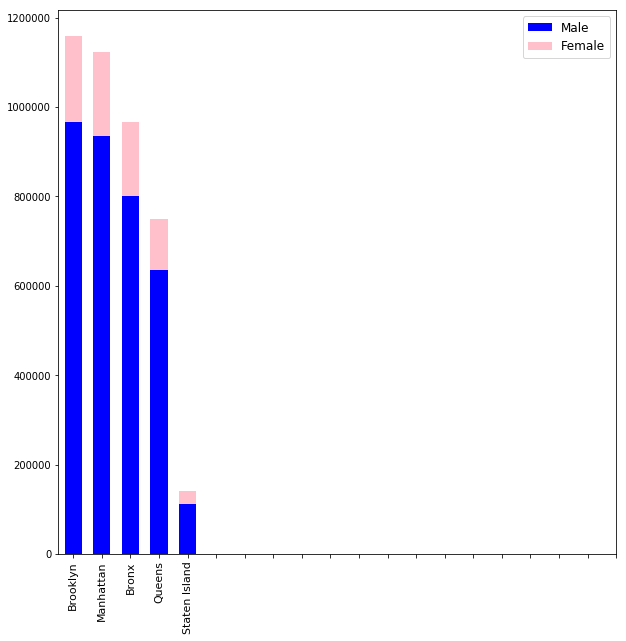

In [239]:
plot_chart(data_dict, color_dict, boroughs_names)

### 3.4 How criminal activity of different Age groups is broken down in the five Boroughs?

The following plot will show the presence of different age groups in each borough.
This way we can see if age groups have higher, lower, or the same criminal activity in a particular borough, compared to their typical activity in the whole city. To make it to the final plot, we must follow the next steps.

>First step, we create the __borough_names__ dictionary, in order to get the full names and not just the initial letters of each borough.

In [265]:
borough_names = {'B':'Bronx', 'K':'Brooklyn', 'M':'Manhattan', 'Q':'Queens', 'S':'Staten Island'}
print (borough_names)

{'B': 'Bronx', 'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'S': 'Staten Island'}


>Secondly we continue by creating two important probability distributions.
* __proba_age__ : is a list that represents the Probability distribution of age groups in all the area of New York.
* __proba_age_per_borough__ : is a dictionary that represents the Probability distribution of age groups for each borough.

In [242]:
# create age_shares, a Series with the crime incidents per race for the whole city of NY
age_shares = data.groupby('AGE_GROUP').size()
# Total is the number of total crime incidents in NYC.
total = age_shares.sum()

# create proba_race (Probability distribution of ages in all the area of New York)
proba_age = []
for i in age_shares:
    proba_age.append(i/total)


# create race_per_borough_shares, a Series with the crime incidents per age for each borough.
age_per_borough_shares = data.groupby(['BOROUGH', 'AGE_GROUP']).size()

# create proba_race_per_borough (Probability distribution of ages for each borough)
ages = age_shares.index.to_list()
proba_age_per_borough = {}
for borough in boroughs:
    for age in ages:
        try:
            proba_age_per_borough[borough_names[borough]].append(age_per_borough_shares[borough][age]/age_per_borough_shares[borough].sum())
        except:
            proba_age_per_borough[borough_names[borough]] = [age_per_borough_shares[borough][age]/age_per_borough_shares[borough].sum()]

>Last step before producing the actual plot, is getting the ratio_dictionary. This shows the ratio of crime incidents of an age group per district, to the corresponding incidents in the whole city.<br/>
It can get three possible values:<br/>
* 1, if the crime level of an age group within the particular borough is the same with its typical crime level in the whole city 
* \>1, if the crime level of an age group within the particular borough is higher than its typical crime level in the whole city
* <1, if the crime level of an age group within the particular borough is lower than its typical crime level in the whole city

In [266]:
ratio_dict = {}
for key, value in proba_age_per_borough.items():
    try:
        ratio_dict[key].append([x/y for x,y in zip(value,proba_age)])
    except:
        ratio_dict[key] = [x/y for x,y in zip(value,proba_age)]

>Time for the plot. The code below produces the final plot, from which we can observe the criminal activity of different races in the different boroughs

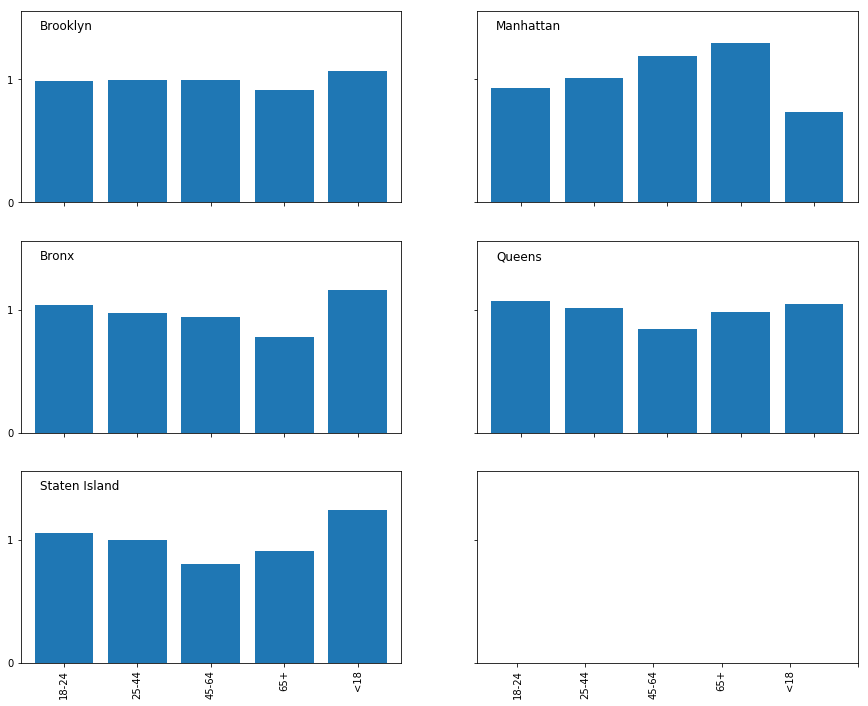

In [267]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(15,12))
axes[0, 0].bar(ages, ratio_dict[list(ratio_dict.keys())[0]])
axes[0, 0].text(0.05, 0.9, list(ratio_dict.keys())[0], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[0, 0].transAxes)
axes[0, 0].margins(x=0.04, y=0.2)


axes[0, 1].bar(ages, ratio_dict[list(ratio_dict.keys())[1]])
axes[0, 1].text(0.05, 0.9, list(ratio_dict.keys())[1], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[0, 1].transAxes)
axes[0, 1].margins(x=0.04, y=0.2)


axes[1, 0].bar(ages, ratio_dict[list(ratio_dict.keys())[2]])
axes[1, 0].text(0.05, 0.9, list(ratio_dict.keys())[2], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[1, 0].transAxes)
axes[1, 0].margins(x=0.04, y=0.2)


axes[1, 1].bar(ages, ratio_dict[list(ratio_dict.keys())[3]])
axes[1, 1].text(0.05, 0.9, list(ratio_dict.keys())[3], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[1, 1].transAxes)
axes[1, 1].margins(x=0.04, y=0.2)


axes[2, 0].bar(ages, ratio_dict[list(ratio_dict.keys())[4]])
axes[2, 0].text(0.05, 0.9, list(ratio_dict.keys())[4], #title taken from the respective dict
                                               horizontalalignment='left',           
                                               fontsize=12,
                                               transform=axes[2, 0].transAxes)
axes[2, 0].margins(x=0.04, y=0.2)

for tick in axes[2,0].get_xticklabels():
    tick.set_rotation(90)
for tick in axes[2,1].get_xticklabels():
    tick.set_rotation(90)
    
plt.xticks(range(6), ages)
plt.yticks(range(2))

plt.show()

# 4. Dataset Creation
>## 1st level datasets<br/>
>The following function returns a dataframe so that we can observe the created dataset and also creates the corresponding .csv file. This dataset contains the number of incidents based on two attributes (eg. incidents for RACE per ARREST_DATE). For example an element of this dataset could be described as the number of Hispanics that commited a crime in year 2006 etc.

In [268]:
def csv_for_two_attributes(attribute1, attribute2, df):
    # make attribute1 the index of the df
    new_index_df = df.set_index(attribute1)
    # create dataframe, which contains number of incidents for attribute2 per attribute1
    if attribute1 == 'ARREST_DATE':
        dataframe = new_index_df.groupby([new_index_df.index.year, attribute2]).size().unstack(level=1)
    else:
        dataframe = new_index_df.groupby([attribute1, attribute2]).size().unstack(level=1)
    
    # create a list with the total number of incidents per row
    total = []
    for _, row in dataframe.iterrows():
        total.append(row.sum())
    
    # add a new column 'Total' to the columns of the existing df
    dataframe['Total'] = total
    
    # replace possible nan values of a dataframe with zeros, so that all values are valid for the visualizations.
    dataframe = dataframe.fillna(0)
    
    # create the csv file
    dataframe.to_csv(attribute2+'_per_'+attribute1+'.csv')
    
    return dataframe

In [269]:
df1 = csv_for_two_attributes('ARREST_DATE', 'AGE_GROUP' , data_final)

>## 2nd level datasets<br/>
>Create .csv and return dataframe with number of incidents based on three attributes (eg. incidents for RACE per ARREST_DATE per Borough). For example, an element of this dataset could be how many Hispanics commited a crime in 2006 inside the area of Bronx etc.

In [270]:
def csv_for_three_attributes(attribute1, attribute2, attribute3, df):
    # make attribute1 the index of the df
    new_index_df = df.set_index(attribute1)
    
    if attribute1== 'ARREST_DATE':
        dataframe = new_index_df.groupby([new_index_df.index.year, attribute2, attribute3]).size().unstack(level=2)
    else:
        dataframe = new_index_df.groupby([attribute1, attribute2, attribute3]).size().unstack(level=2)
    
    # create a list with the total number of incidents per row
    total = []
    for _, row in dataframe.iterrows():
        total.append(row.sum())
    
    # add a new column 'Total' to the columns of the existing df
    dataframe['Total'] = total
    
    # replace possible nan values of a dataframe with zeros, so that all values are valid for the visualizations.
    dataframe = dataframe.fillna(0)
    
    # create the csv file
    dataframe.to_csv(attribute3+'_per_'+attribute1+'_per_'+attribute2+'.csv')
    
    return dataframe

In [271]:
df2 = csv_for_three_attributes('ARREST_DATE', 'BOROUGH', 'GENDER', data_final)

>## 3rd level datasets<br/>
>Create .csv and return dataframe with number of incidents based on four attributes (eg.  incidents for RACE per ARREST_DATE per BOROUGH per GENDER). For example, an example element might indicate how many White Females commited a crime in Manhattan during 2016.

In [272]:
def csv_for_four_attributes(attribute1, attribute2, attribute3, attribute4, df):
    # make attribute1 the index of the df
    new_index_df = df.set_index(attribute1)
    
    if attribute1== 'ARREST_DATE':
        dataframe = new_index_df.groupby([new_index_df.index.year, attribute2, attribute3, attribute4]).size().unstack(level=3)
    else:
        dataframe = new_index_df.groupby([attribute1, attribute2, attribute3, attribute4]).size().unstack(level=3)
    
    # create a list with the total number of incidents per row
    total = []
    for _, row in dataframe.iterrows():
        total.append(row.sum())
    
    # add a new column 'Total' to the columns of the existing df
    dataframe['Total'] = total
    
    # replace possible nan values of a dataframe with zeros, so that all values are valid for the visualizations.
    dataframe = dataframe.fillna(0)
    
    # create the csv file
    dataframe.to_csv(attribute4+'_per_'+attribute1+'_per_'+attribute2+'_per_'+attribute3+'.csv')
    
    return dataframe

In [273]:
df3 = csv_for_four_attributes('ARREST_DATE', 'BOROUGH', 'RACE', 'GENDER', data_final)

# 5. Genre

The genre of our visualization is a __*Poster*__. Regardless of the genre, a good practice is to maintain a balance between author-driven and read-driven format of the visualization. Due to the demographic approach that we have chosen to follow in our analysis, the format of the narrative will be _purely reader-driven_. A purely reader-driven approach has no prescribed ordering of images, no messaging, and a high degree of interactivity. That is why we have chosen the following tools:<br/>

___Visual Narrative___<br/>
>_Visual Structuring_<br/>
* Progress bar/timebar


___Narrative Structure___<br/>
>_Ordering_<br/>
* Random Access

>_Interactivity_<br/>
* Hover Highlighting/Details
* Filtering

# 6. Visualizations

Our visualizations start with a ___Map___ followed by two ___Barcharts___ and a ___PieChart___.

#### Map
The map is produced with New York Geodata, which bisect the city to its five major boroughs. The interactivity features provided by this visualization are a slider which functions as a timebar, as well as a tootlip with on demand details (borough name, number of crime incidents) everytime the mouse hovers above a borough. Moreover, everytime the slider changes year, the color of every borough changes to either a lighter or darker tone, according to the decrease or increace of crime incidents in the respective area. 


#### Barcharts
The two barcharts visualize the distribution of crime incidents per race and crime incidents per age group respectively. The interactivity feature is a timebar, which lets the user see the shape of these distribution for every different year.



##### Piechart
Lastly the piechart graph was used for the visualization of crime incidents per gender. Since there are two genders in our dataset, a barchart would be an overkill. The interactivity feature here is also a slider that lets the user change between the different years in the dataset and see the corresponding share of males and females on crime incidents.

# 7. Discussion

### 7.1 What went well
The positive outcome of our analysis and narrative visualization, is that we managed to put together a poster that contains a good amount of interactivity. This poster is not supposed to tell the same structured story to every reader, but rather let the reader create the story he/she wants to learn about. The user can intuitively navigate and explore the visualizations and use the interaction features at will, without the need of guidance of any sort. Moreover there is no type of irreversible actions, which means that at any point one can go back to the last state of the visualization and keep the exploration going. To cut a long story short, we managed to get a purely reader-driven narrative, which enables the reader to get a fair amount of insights about crime in NYC in the 2006-2017 time period.

### 7.2 What is still missing? What could be improved? Why?
Our goal for this project was to create a poster that consists of visualizations fully binded with each other. For example, a click on a particular Borough on the map should lead to a change in all the other graphs, which now should contain the same information, but limited to just that particular borough. Similarly, brushing an area of the age_group barchart should also cause changes to all the other graphs, which now should contain the same information, but limited to just the brushed age group(s). This would dramatically improve the exploration power of the user/reader, as he/she could basically filter the data and get on-demand information about either general, or really specific crime demographics. You can get a taste of a such great vizualization [here](https://www.infino.me/mortality/usmap). It is really worth a bit of your time, regardless of its relatively grim subject.

As it turned out, to get such a high level of interactivity, we needed more time to figure out how to manipulate the data and tame d3.js. We are quite happy with what we achieved so far, both with Javascript and Python, and will surely try to further develop our skills on such great tools.

# 8. Contributions



>#### Observable Notebook, d3.js, c3.js Visualizations --> Emmanouil Chalvatzopoulos<br/>
>#### Ipython Notebook, Python Visualizations --> Konstantinos Theologitis